# Yulu business case

Problem statement:
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

We would need to check the below things:

1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
2. How well those variables describe the electric cycle demands

We will leverage the techniques of hypothesis testing to check what all the factors that effect number of rental bikes in use and prove if the conclusions are statistically significant or not.

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv('Yulu.csv')

In [3]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


No null values observed

In [5]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [7]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


<AxesSubplot:xlabel='season', ylabel='temp'>

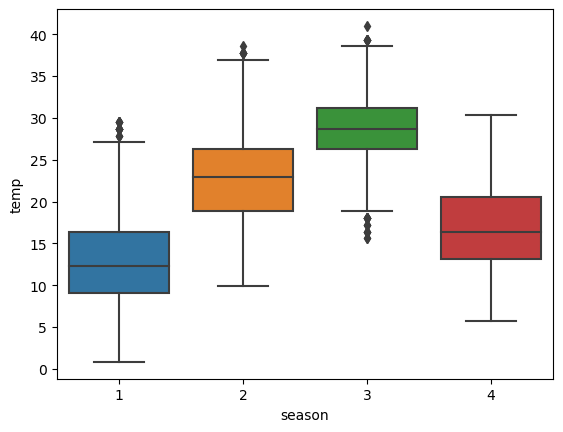

In [8]:
sns.boxplot(data=df, y='temp', x='season')

1: spring
2: summer
3: fall
4: winter

Temperature distributions as shown above. For fall it's the highest and then summer and for spring and winter it's kind of similar. Still median temperature for winter season is higher than spring.

<AxesSubplot:xlabel='season', ylabel='atemp'>

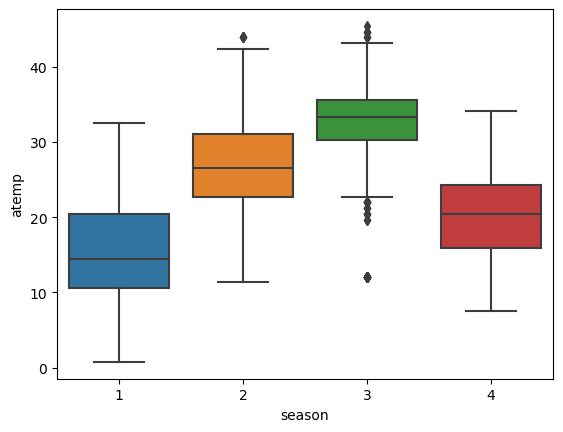

In [9]:
sns.boxplot(data=df, y='atemp', x='season')

Trend of feeling temperture is similar to actual temperature

<AxesSubplot:xlabel='season', ylabel='count'>

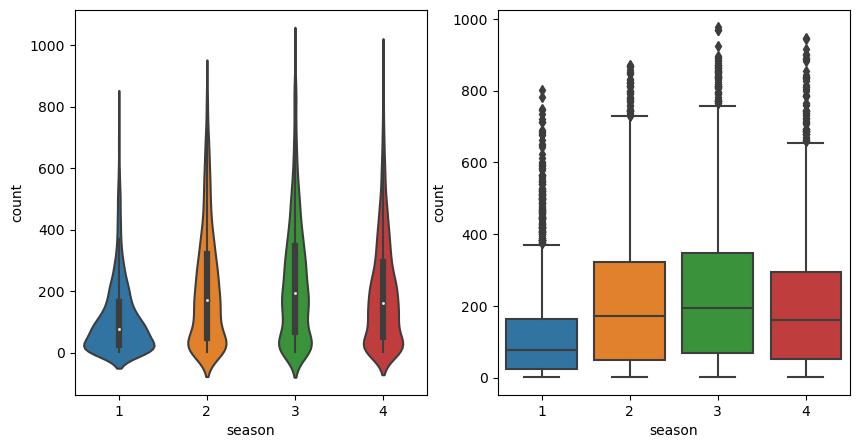

In [10]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.violinplot(data=df, x='season', y='count')

plt.subplot(1,2,2)
sns.boxplot(data=df, x='season', y='count')

Median of count are higher for seasons summer and fall. Minimum is observed for spring.

<AxesSubplot:xlabel='weather', ylabel='count'>

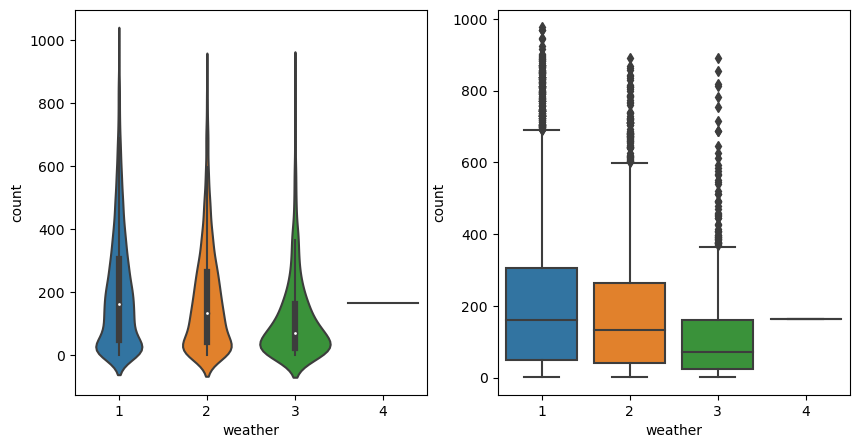

In [11]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.violinplot(data=df, x='weather', y='count')

plt.subplot(1,2,2)
sns.boxplot(data=df, x='weather', y='count')

<AxesSubplot:xlabel='workingday', ylabel='count'>

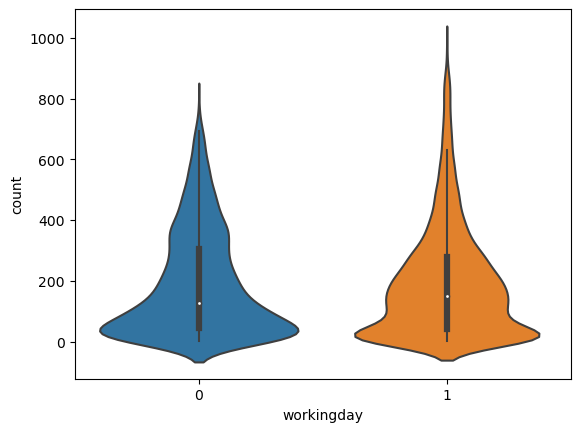

In [12]:
sns.violinplot(data=df, x='workingday', y='count')

<AxesSubplot:xlabel='workingday', ylabel='count'>

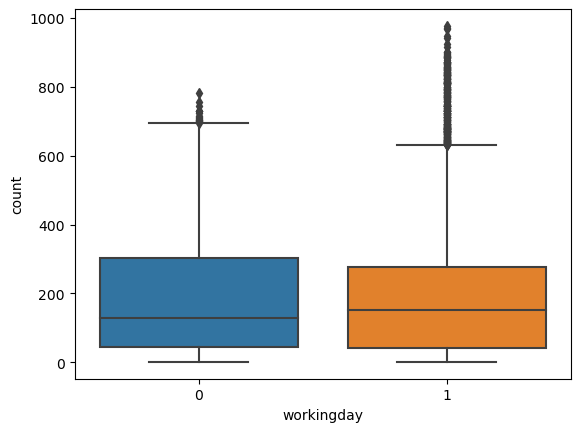

In [13]:
sns.boxplot(data=df, x='workingday', y='count')

<AxesSubplot:xlabel='workingday', ylabel='count'>

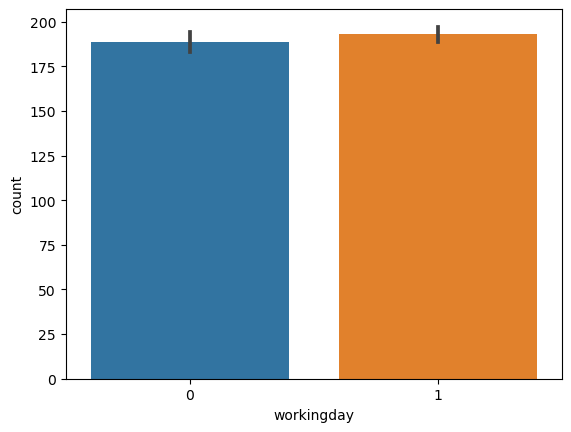

In [14]:
sns.barplot(data=df, x='workingday', y='count', estimator=np.mean)

In [15]:
df.groupby('workingday')['count'].mean()

workingday
0    188.506621
1    193.011873
Name: count, dtype: float64

Mean and median of count for working and non-working days are looking mostly similar. But we can see much higher number of outliers in case of working day compared to non-working day. So 2 sample ttest to be done to confirm this.

In [16]:
from scipy.stats import ttest_ind

In [17]:
wd = df[df['workingday']==1]['count']
nwd = df[df['workingday']==0]['count']

#significance level is chosen as 5 percent

alpha = .05

#Ho : mu1=mu2(working day has no effect on number of rental bikes in use)
#Ha : mu1!=mu2(working day has effect on number of rental bikes in use)

t_stat, p_value = ttest_ind(wd,nwd)

print('t_stat =', t_stat)

print('p value =', p_value)

if p_value<alpha:
    print('reject Ho')
else:
    print('fail to reject Ho')

t_stat = 1.2096277376026694
p value = 0.22644804226361348
fail to reject Ho


Since we failed to reject Ho, it can be concluded that total number of rental bikes in use is not dependedent on whether it's working day or not.

<AxesSubplot:xlabel='season', ylabel='count'>

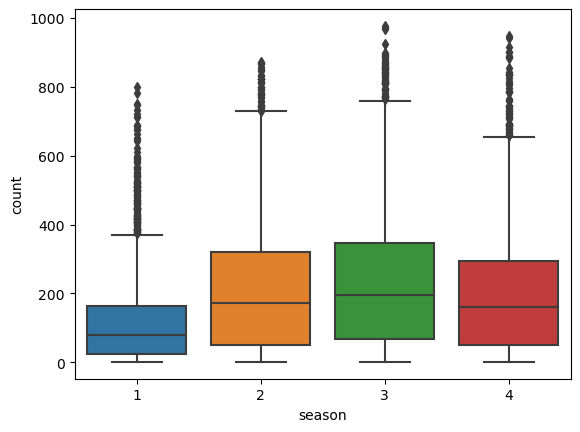

In [18]:
sns.boxplot(data=df, x='season', y='count')

<AxesSubplot:xlabel='season', ylabel='count'>

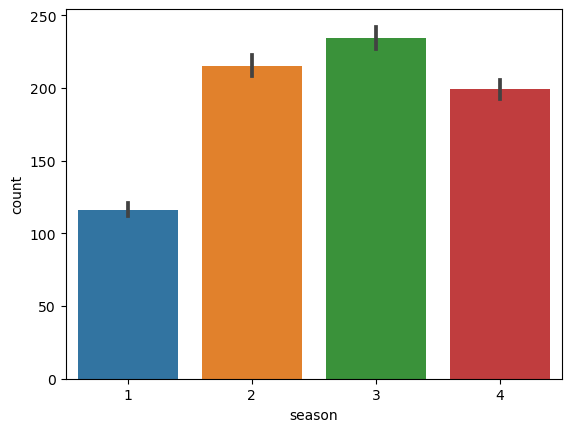

In [19]:
sns.barplot(data=df, x='season', y='count', estimator=np.mean)

In [20]:
df.groupby('season')['count'].mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64

In [27]:
from scipy.stats import shapiro, levene

Since we have more than 2 categories we need to conduct Anova test to confirm if the mean of total rental bikes across all seasons are same or not.

So assumptions of Anova are
1. Data should be Gaussian.
2. Data should be independent of each other.
3. Equal variances across all groups.

In [39]:
#Checking if the data is normally distributed or not

sample_shapiro = df['count'].sample(n=45)

#Ho: Data is normally distributed
#Ha: Data is not Gaussian

stat, p = shapiro(sample_shapiro)

alpha = .05

if p<alpha:
    print('Reject Ho, data is not Gaussian')
else:
    print('Fail to reject Ho, data is Gaussian')

Reject Ho, data is not Gaussian


In [41]:
#Creating groups with respect to seasons

s1=df[df['season']==1]['count']
s2=df[df['season']==2]['count']
s3=df[df['season']==3]['count']
s4=df[df['season']==4]['count']

#Checking if the groups has equal variances or not

#Ho: Groups has equal variances
#Ha: Variances of groups are not equal

stat, p = levene(s1,s2,s3,s4)

alpha = .05

if p<alpha:
    print('Reject Ho, variances of groups are not equal')
else:
    print('Fail to reject Ho, hence variances of groups are equal')

Reject Ho, variances of groups are not equal


Ideally, because of the conditions of data being Gaussian and groups having equal variances fail, we cannot perform Anova test here. Still we will conduct Anova test once and confirm the result with Kruskal-Wallis test

In [42]:
from scipy.stats import f_oneway

In [43]:
#Conducting Anova test

#Ho: All the means are equal(Season has no effect on number of rental bikes in use)
#Ha: At lease one mean is different(Season has effect on number of rental bikes in use)

stat, p = f_oneway(s1,s2,s3,s4)

alpha = .05

if p<alpha:
    print('Reject Ho , season has effect on count of rental bikes')
else:
    print('Fail to reject Ho, season has no effect on count of rental bikes in use')

Reject Ho , season has effect on count of rental bikes


In [44]:
#Conducting Kruskal-Wallis test

from scipy.stats import kruskal

stat, p = kruskal(s1,s2,s3,s4)

alpha = .05

if p<alpha:
    print('Reject Ho , season has effect on count of rental bikes')
else:
    print('Fail to reject Ho, season has no effect on count of rental bikes in use')

Reject Ho , season has effect on count of rental bikes


We can conclude that the difference that we see in the mean of count of rental bikes in use is statistically significant.

<AxesSubplot:xlabel='weather', ylabel='count'>

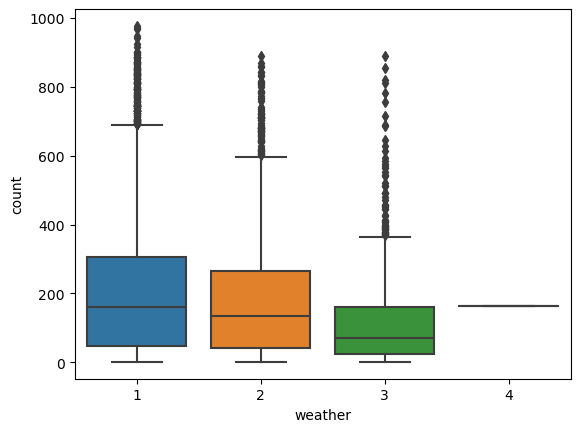

In [21]:
sns.boxplot(data=df, x='weather', y='count')

<AxesSubplot:xlabel='weather', ylabel='count'>

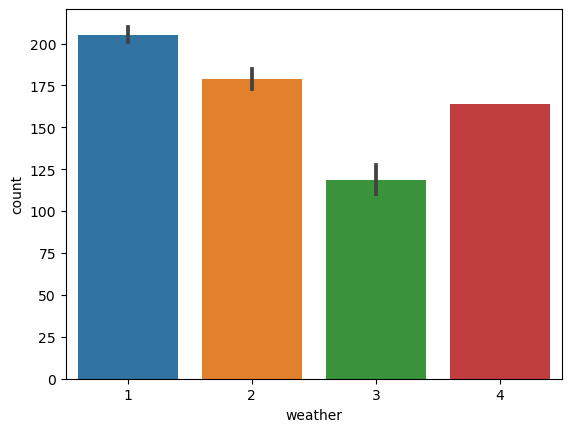

In [22]:
sns.barplot(data=df, x='weather', y='count', estimator=np.mean)

In [23]:
df.groupby('weather')['count'].mean()

weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64

Highest average of count is observed when weather conditions are clear, Few clouds, partly cloudy, partly cloudy, and a little bit less average count is observed when the weather is Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist. Minimum average count is observed when the weather conditions are Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds. Surprisingly a little higher average is observed when it's raining heavily compared to light rain weather condition.

Now to confirm if the above shown difference in count of rental bikes with respect to weather we need to perform hypothesis testing

In [46]:
#Checking if the data is normally distributed or not

sample_shapiro = df['count'].sample(n=45)

#Ho: Data is normally distributed
#Ha: Data is not Gaussian

stat, p = shapiro(sample_shapiro)

alpha = .05

if p<alpha:
    print('Reject Ho, data is not Gaussian')
else:
    print('Fail to reject Ho, data is Gaussian')

Reject Ho, data is not Gaussian


In [48]:
#Creating groups with respect to seasons

w1=df[df['season']==1]['count']
w2=df[df['season']==2]['count']
w3=df[df['season']==3]['count']
w4=df[df['season']==4]['count']

#Checking if the groups has equal variances or not

#Ho: Groups has equal variances
#Ha: Variances of groups are not equal

stat, p = levene(w1,w2,w3,w4)

alpha = .05

if p<alpha:
    print('Reject Ho, variances of groups are not equal')
else:
    print('Fail to reject Ho, hence variances of groups are equal')

Reject Ho, variances of groups are not equal


Ideally, because of the conditions of data being Gaussian and groups having equal variances fail, we cannot perform Anova test here. Still we will conduct Anova test once and confirm the result with Kruskal-Wallis test

In [49]:
#Conducting Anova test

#Ho: All the means are equal(Season has no effect on number of rental bikes in use)
#Ha: At lease one mean is different(Season has effect on number of rental bikes in use)

stat, p = f_oneway(w1,w2,w3,w4)

alpha = .05

if p<alpha:
    print('Reject Ho , season has effect on count of rental bikes')
else:
    print('Fail to reject Ho, season has no effect on count of rental bikes in use')

Reject Ho , season has effect on count of rental bikes


In [50]:
#Conducting Kruskal-Wallis test

from scipy.stats import kruskal

stat, p = kruskal(w1,w2,w3,w4)

alpha = .05

if p<alpha:
    print('Reject Ho , season has effect on count of rental bikes')
else:
    print('Fail to reject Ho, season has no effect on count of rental bikes in use')

Reject Ho , season has effect on count of rental bikes


We can conclude that the difference that we see in the mean of count of rental bikes in use with respect to weather conditions is statistically significant.

In [54]:
pd.crosstab(df['season'], df['weather'],margins=True)

weather,1,2,3,4,All
season,,,,,
1,1759,715,211,1,2686
2,1801,708,224,0,2733
3,1930,604,199,0,2733
4,1702,807,225,0,2734
All,7192,2834,859,1,10886


To check if weather is dependent on the season we need to perform chisquare test

In [56]:
from scipy.stats import chi2_contingency

In [61]:
#Ho: weather is independent of season
#Ha: weather is dependent on season


stat, p, dof, expected = chi2_contingency(pd.crosstab(df['season'], df['weather']))

alpha = .05

if p<alpha:
    print('Reject Ho , weather dependent on season')
else:
    print('Fail to reject Ho, weather is independent of season')

Reject Ho , weather dependent on season


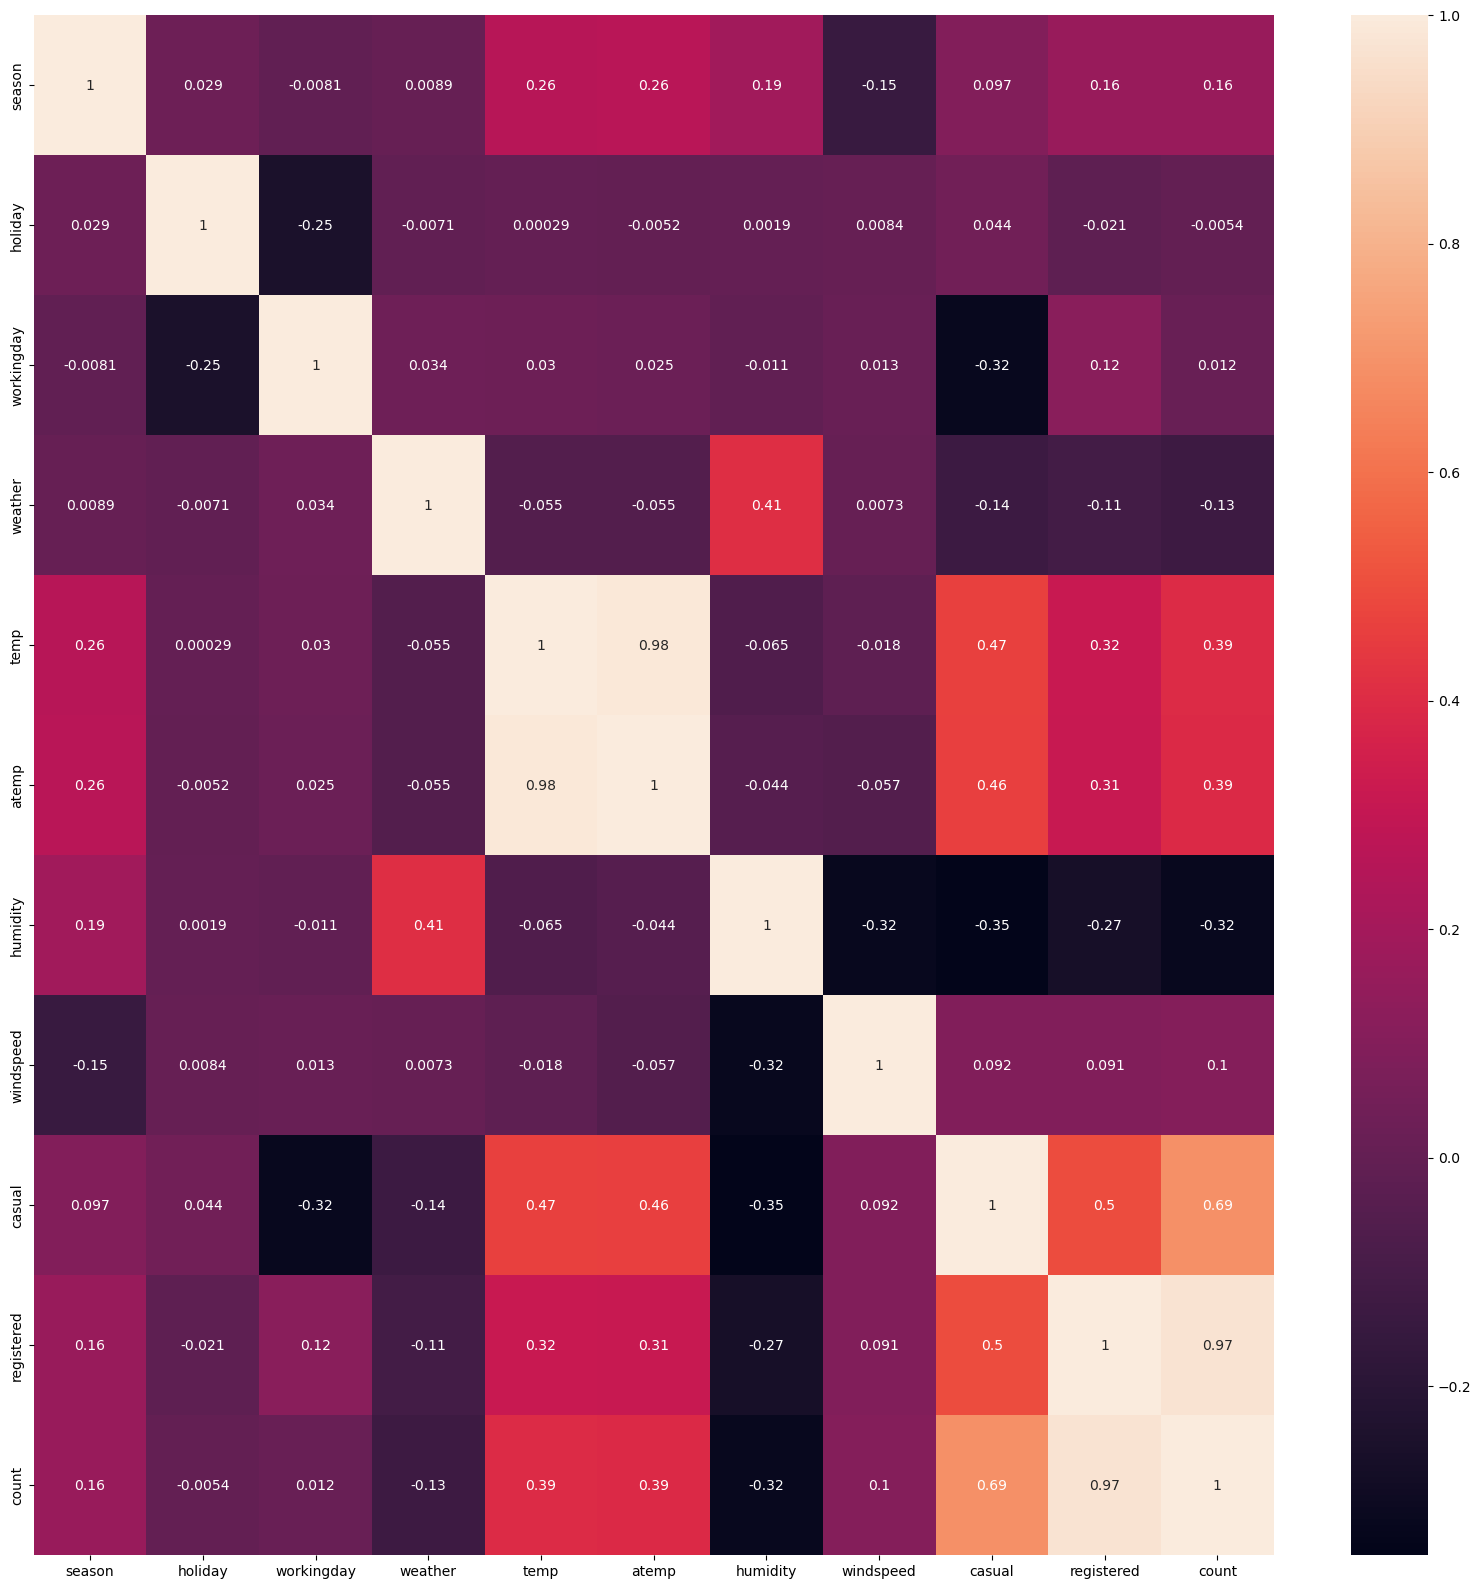

In [64]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

As we can see, feeling temperature and actual temperature are highly positively correlated with a correlation coefficient of 0.98. Similarly count and registered users are highly positively correlated with a correlation coefficient of 0.97.

Humidity and count are negatively correlated with a correlation coeffient of -0.32.

In [78]:
from scipy.stats import pearsonr,spearmanr

To check if the negative correlation between humidity and count is significant or not, we need to perform pearson or spearman correlation test.

In [82]:
#Pearson

#Ho: No correlation between humidity and count
#Ha: Correlation between humidity and count is statistically significant

stat,p = pearsonr(df['humidity'], df['count'])

alpha = .05

print('Test statistic=', stat, 'and', 'p value=',p)

if p<alpha:
    print('Reject Ho, correlation between humidity and count is statistically significant')
else:
    print('Fail to reject Ho, no correlation between humidity and count')

Test statistic= -0.3173714788765952 and p value= 2.921541663750899e-253
Reject Ho, correlation between humidity and count is statistically significant


In [83]:
#Spearman

#Ho: No correlation between humidity and count
#Ha: Correlation between humidity and count is statistically significant

stat,p = spearmanr(df['humidity'], df['count'])

alpha = .05

print('Test statistic=', stat, 'and', 'p value=',p)

if p<alpha:
    print('Reject Ho, correlation between humidity and count is statistically significant')
else:
    print('Fail to reject Ho, no correlation between humidity and count')

Test statistic= -0.35404912201756106 and p value= 0.0
Reject Ho, correlation between humidity and count is statistically significant


With both Pearson test and Spearman test implying the same thing, we can conclude that the correlation between humidity and count is statisctically significant. Hence it is expected that on more humid days the count will be less compared to less humid days.

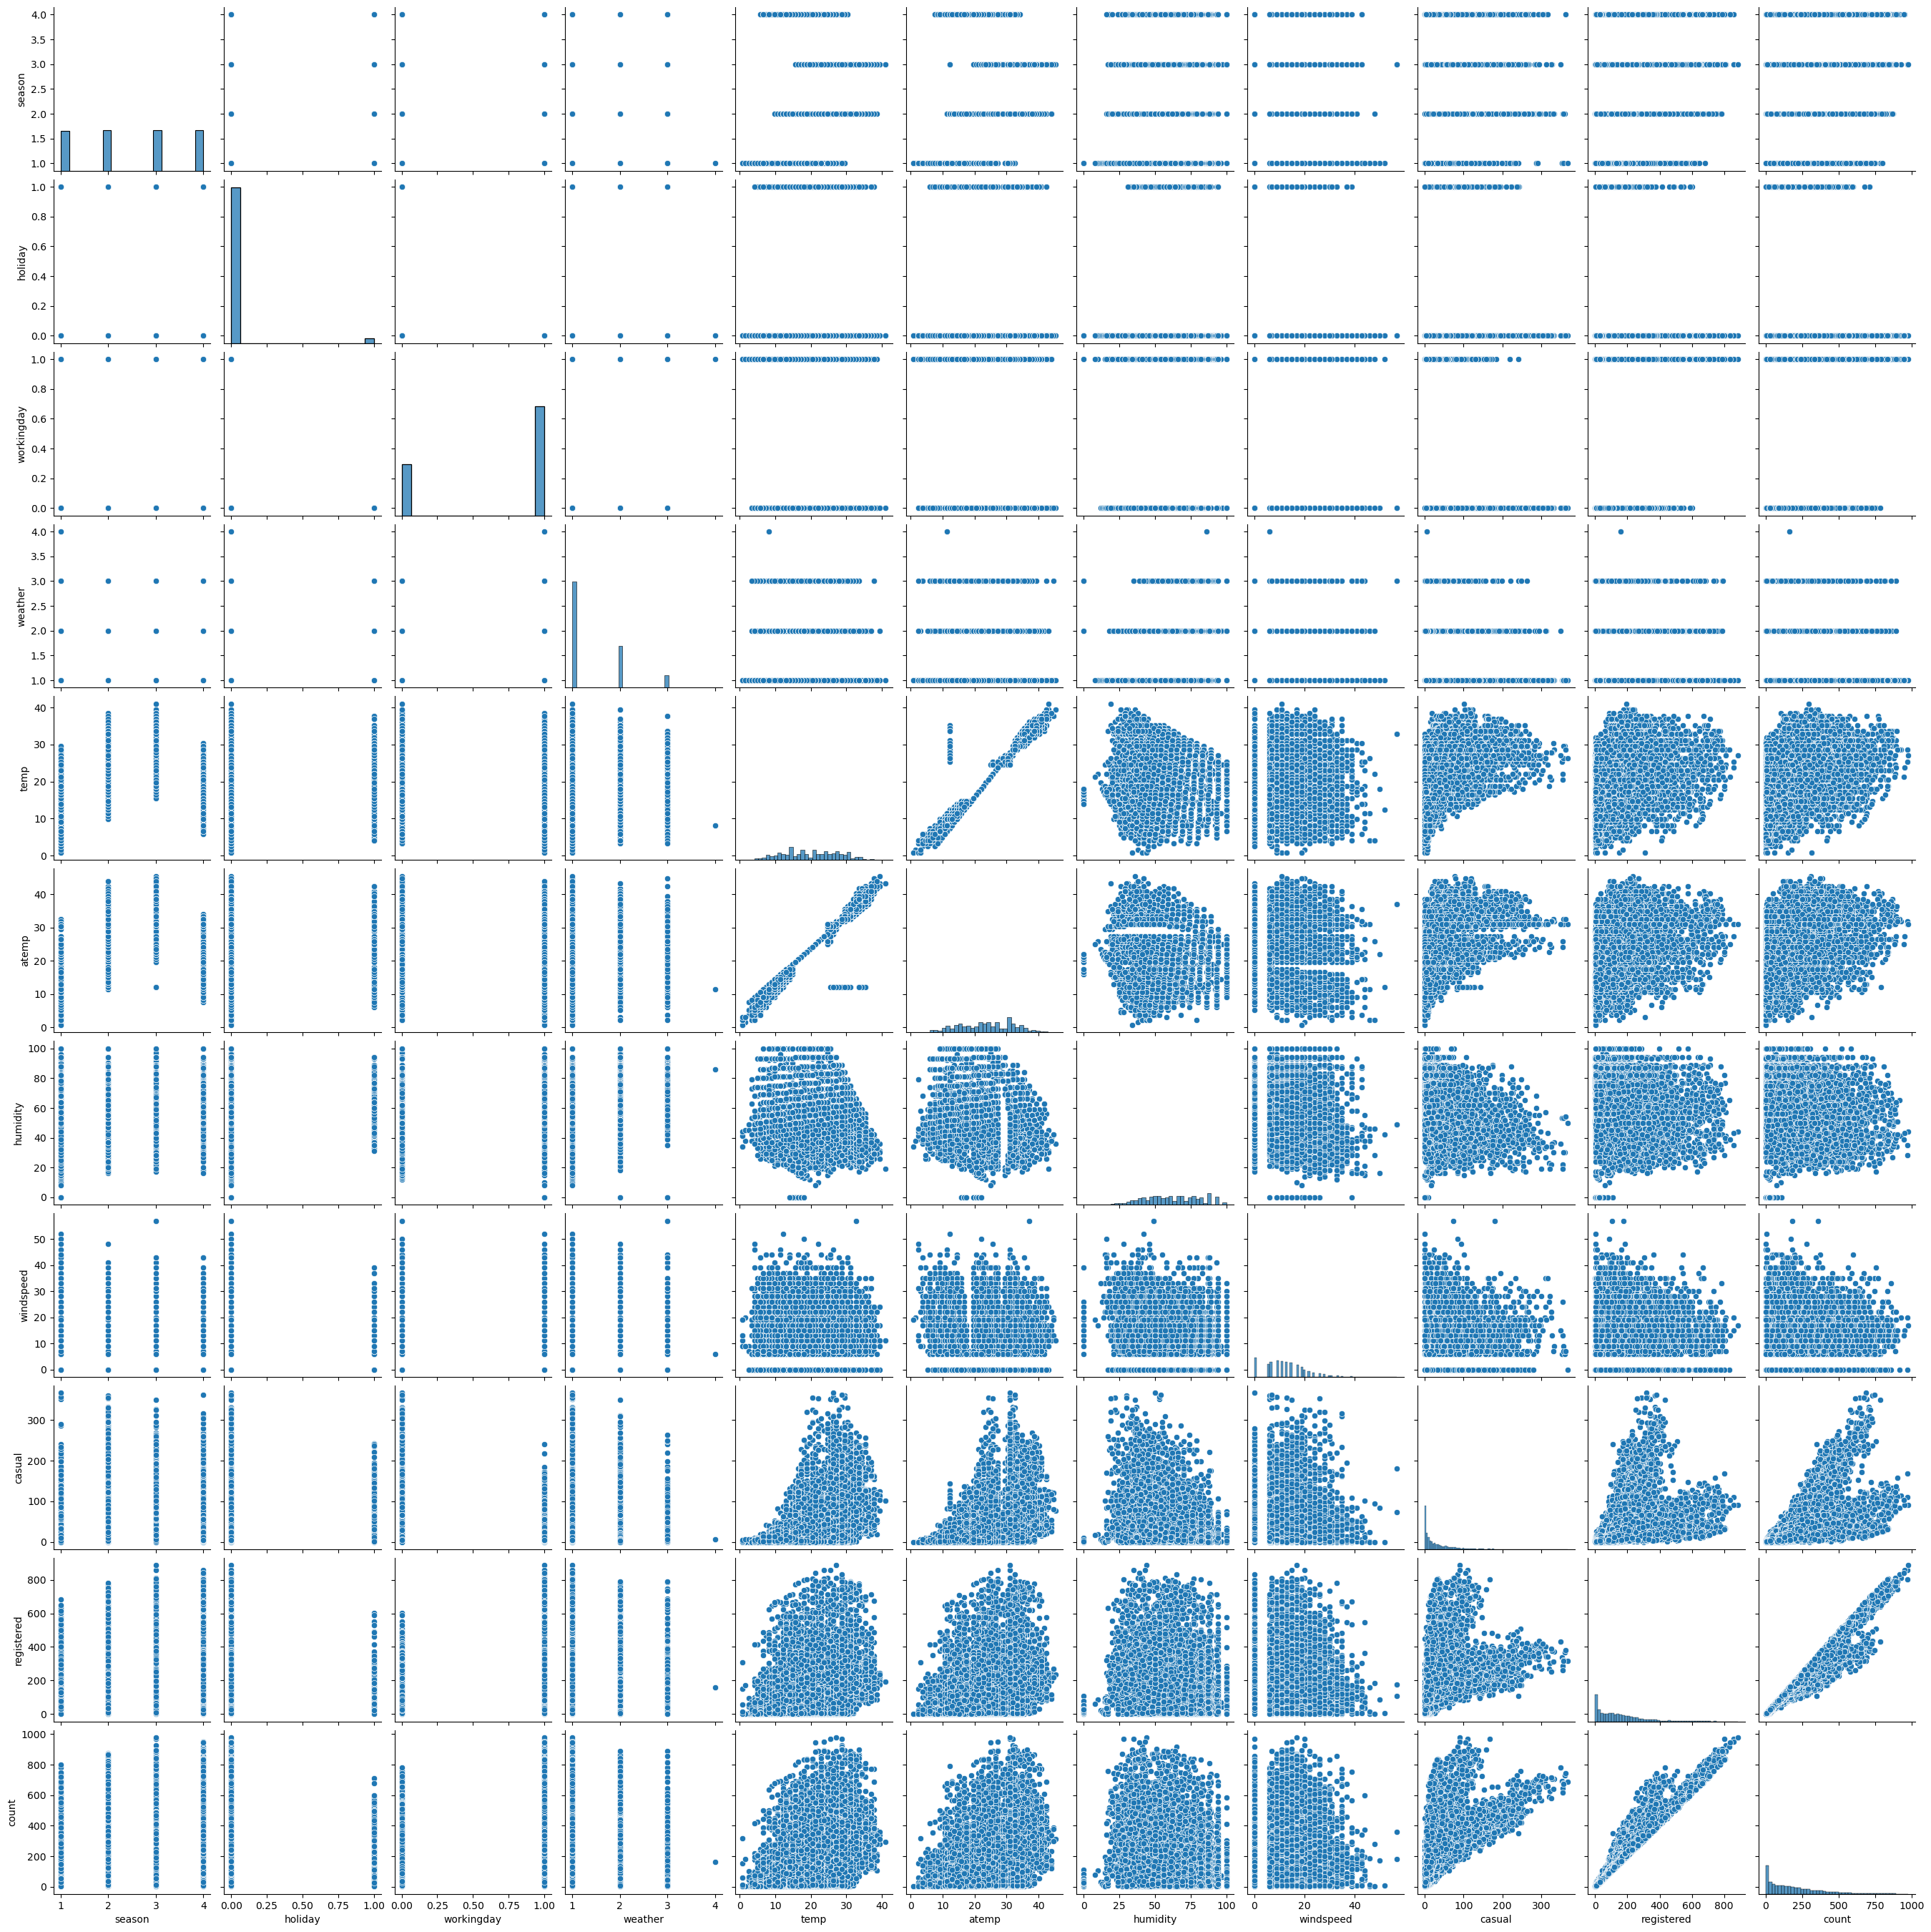

In [65]:
sns.pairplot(df)

<AxesSubplot:xlabel='registered', ylabel='count'>

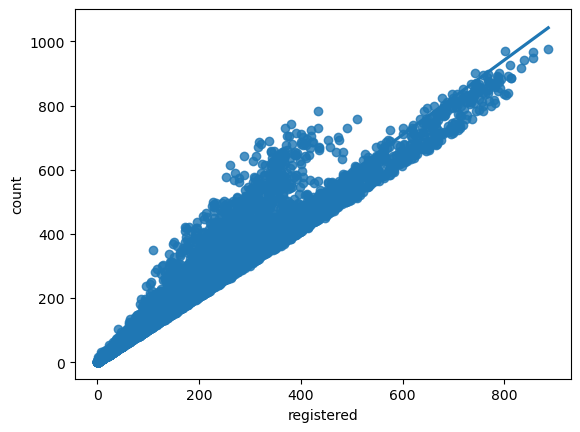

In [70]:
sns.regplot(data=df, x='registered', y='count')

The above scatterplot with regression line shows the correlation between columns registered and count.

<AxesSubplot:xlabel='humidity', ylabel='count'>

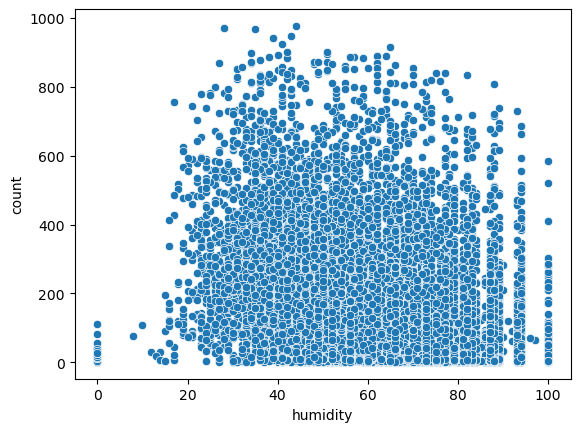

In [74]:
sns.scatterplot(data=df, x='humidity', y='count')

Text(0.5, 0, 'Count of total rental bikes')

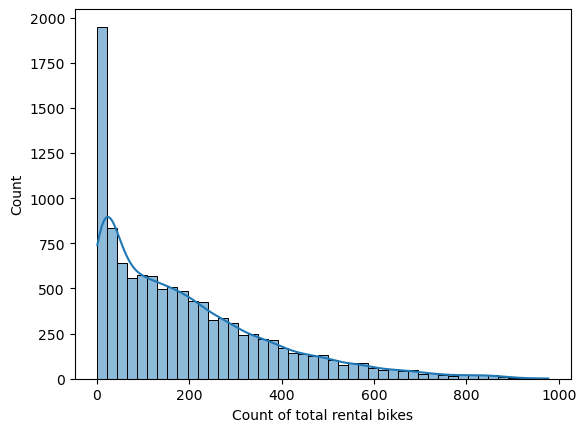

In [24]:
sns.histplot(data=df, x='count', kde=True)
plt.xlabel('Count of total rental bikes')

Distribution of count is right skewed

In [25]:
df['count'].max()

977

Maximum number of total rental bikes in use at a time is 977

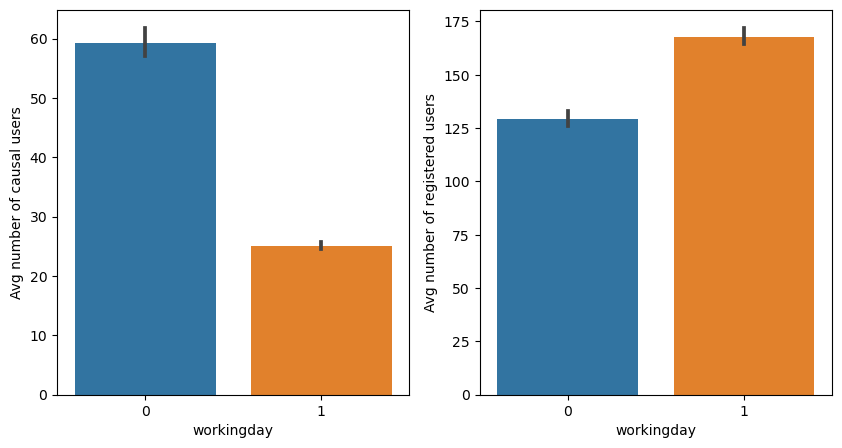

In [26]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.barplot(data=df, x='workingday', y='casual', estimator=np.mean)
plt.ylabel('Avg number of causal users')

plt.subplot(1,2,2)
sns.barplot(data=df, x='workingday', y='registered', estimator=np.mean)
plt.ylabel('Avg number of registered users')

plt.show()

When comparing casual users and regsitered users with respect to working day/non-working day, the trens is opposite. Casual users tend to use rental bikes more on non-working day whereas registered users tends to use it more on working day.